In [844]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [845]:
D = 2000

In [846]:
begin = np.random.randn(D).astype(np.float32)

In [847]:
A = np.random.randn(D).astype(np.float32)
B = np.random.randn(D).astype(np.float32)
C = np.random.randn(D).astype(np.float32)

In [892]:
S = np.array([begin, A, B, A, B, A, C], dtype=np.float32)
T = len(S)
S.shape

(7, 2000)

In [893]:
# creat 4 positionnal embeddings
P = np.random.randn(T, D).astype(np.float32)
P.shape

(7, 2000)

In [913]:
X =  P/5 +S

In [914]:
#QK = (P[1].reshape(D, 1) @ P[0].reshape(1, D)) + (P[2].reshape(D, 1) @ P[1].reshape(1, D)) + (P[3].reshape(D, 1) @ P[2].reshape(1, D)) + (P[4].reshape(D, 1) @ P[3].reshape(1, D))
QK.shape

(2000, 2000)

In [915]:
QK = np.zeros((D, D), dtype=np.float32)
for i in range(T-1):
    QK += P[i+1].reshape(D, 1) @ P[i].reshape(1, D)

In [916]:
# get attention matrix
Att = X @ QK @ (X.T)
Att.shape

(7, 7)

In [917]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [918]:
Att = softmax(Att, axis=1)

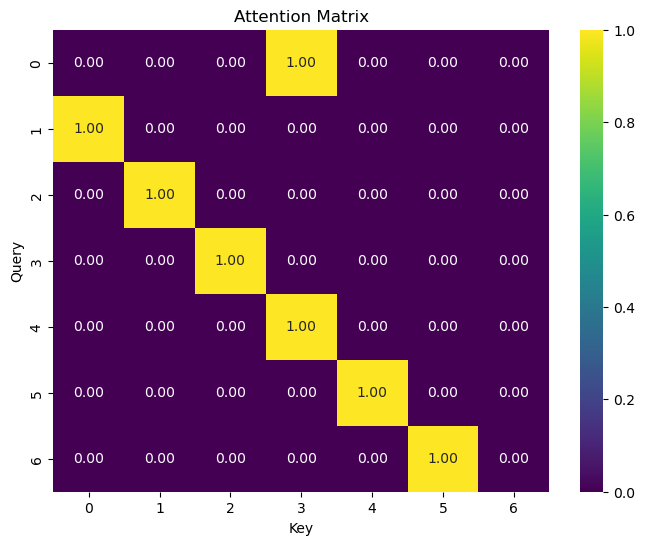

In [919]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [920]:
V = np.random.randn(D, D).astype(np.float32)
V.shape

(2000, 2000)

In [921]:
(X @ V)/np.linalg.norm(X @ V)@ (V@A/np.linalg.norm(V@A))

array([-0.00013158,  0.01334825, -0.00377708,  0.01415938, -0.00668592,
        0.00992783,  0.00018261], dtype=float32)

In [922]:
(V@A).T@(V@A)

4022401.0

In [923]:
Z@ (V@A/np.linalg.norm(V@A))

array([ 0.01543942,  0.00109646,  0.00267195,  0.00561448,  0.03080342,
       -0.01606176,  0.00115844], dtype=float32)

In [924]:
Z = (Att @ X @ V)/np.linalg.norm(Att @ X @ V)+X/np.linalg.norm(X)
Z.shape

(7, 2000)

In [925]:
Sem_A =  V.T@A/np.linalg.norm(V.T@A)
Sem_B = V.T@B/np.linalg.norm(V.T@B)
Sem_C = V.T@C/np.linalg.norm(V.T@C)

In [926]:
Sem_A.shape

(2000,)

In [927]:
#QK2 = (Sem_A.reshape(D,1)@Sem_A.reshape(1,D)) + (Sem_B.reshape(D,1)@Sem_B.reshape(1,D)) + (Sem_C.reshape(D,1)@Sem_C.reshape(1,D)) + ((A/np.linalg.norm(A)).reshape(D,1)@(A/np.linalg.norm(A)).reshape(1,D)) + ((B/np.linalg.norm(B)).reshape(D,1)@(B/np.linalg.norm(B)).reshape(1,D)) + ((C/np.linalg.norm(C)).reshape(D,1)@(C/np.linalg.norm(C)).reshape(1,D))

In [928]:
QK2 = np.identity(D)

In [929]:
Att2 = Z  @(Z.T)

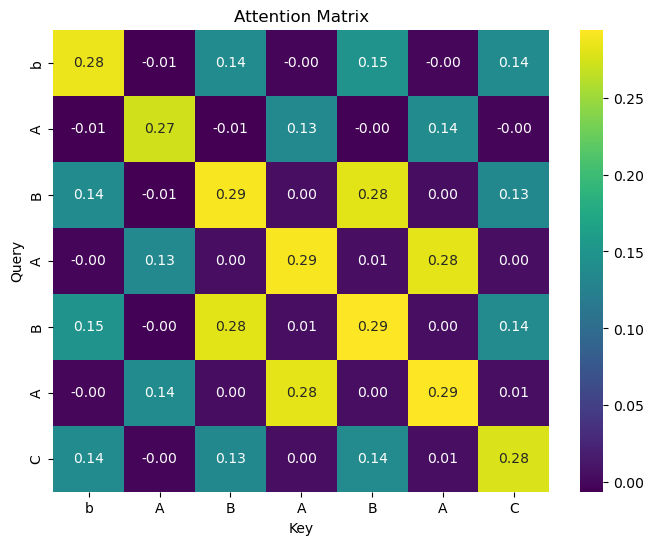

In [930]:
import matplotlib.pyplot as plt
import seaborn as sns

seq = ['b', 'A', 'B', 'A', 'B', 'A', 'C']

plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis", 
            xticklabels=seq, yticklabels=seq)
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
